<a href="https://colab.research.google.com/github/Randyguzman/Filtros_Preprocesamiento/blob/main/FiltroLaplaciano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving TC1.jpg to TC1 (1).jpg


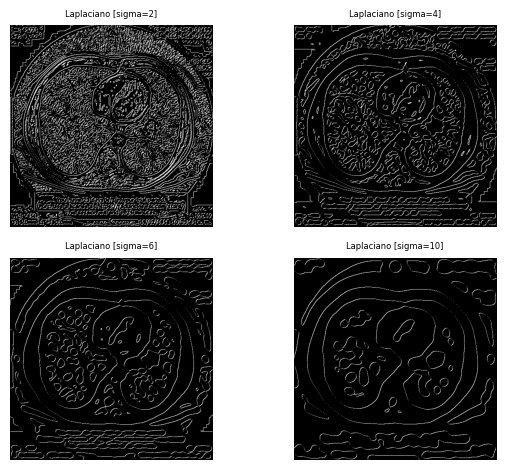

In [ ]:
# Importamos las librerías necesarias.
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
from scipy import ndimage



def are_zero_neighbors(image, pixel_location):
    """
    Determina si en la vecindad de 4x4 de un píxel existe alguno que
    sea 0.
    :param image: Imagen de entrada.
    :param pixel_location: Ubicación del píxel a analizar.
    """
    (i, j) = pixel_location
    for r in range(-1, 2):
        for c in range(-1, 2):
            if r == 0 and c == 0:
                continue

            if image[i + c, j + c] == 0:
                return True

    return False

def zero_crossing(image):
    """
    Calcula el punto de intersección con el cero. Básicamente, producimos una imagen donde la magnitud
    entre píxeles vecinos cambia de signo.
    Más info: https://en.wikipedia.org/wiki/Zero_crossing#In_image_processing
    """
    image[image > 0] = 1
    image[image < 0] = 0

    output_image = np.zeros(image.shape)

    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            if image[i][j] > 0 and are_zero_neighbors(image, (i, j)):
                output_image[i][j] = 255

    return output_image

# Cargamos la imagen de prueba y la convertimos a escala de grises.
uploaded = files.upload()
image_file = 'TC1.jpg' # representacion en arreglo de imagen
input_image = imread(image_file)  # this is the array representation of the input image
[nx, ny, nz] = np.shape(input_image)  # nx: height, ny: width, nz: colors (RGB)

# Extracting each one of the RGB components
r_img, g_img, b_img = input_image[:, :, 0], input_image[:, :, 1], input_image[:, :, 2]

# The following operation will take weights and parameters to convert the color image to grayscale
gamma = 1.400  # a parameter
r_const, g_const, b_const = 0.2126, 0.7152, 0.0722  # weights for the RGB components respectively
grayscale_image = r_const * r_img ** gamma + g_const * g_img ** gamma + b_const * b_img ** gamma


plt.figure(1)

for i, sigma in enumerate([2, 4, 6, 10], start=1):
    plt.subplot(220 + i)
    # Calculamos el Laplaciano de la imagen, usando un filtro Gaussiano configurado con el sigma de la iteración actual.
    result = ndimage.gaussian_laplace(grayscale_image, sigma=sigma)

    # Posteriormente, calculamos el "zero-crossing" del Laplaciano. Esto nos dará los bordes detectados.
    result = zero_crossing(result)

    plt.imshow(result, cmap='gray')
    plt.axis('off')
    plt.title(f'Laplaciano [sigma={sigma}]', size=6)

# Mostramos la imagen
plt.tight_layout()
plt.show()